<a href="https://colab.research.google.com/github/swatidv/WTI-Crude-Oil-Price-Prediction/blob/main/Crude_oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Dataset_is_Vaccinated.csv")
df

,Date,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
0,2016-12-15,91.5,4516.18,4334.960,181.220,50.90,51.97,52.91,53.62,0.905,2,0.1,50.90,50.90
1,2016-12-16,91.5,4515.22,4341.639,173.581,51.90,52.95,53.87,54.56,0.948,2,0.2,50.90,51.90
2,2016-12-19,91.4,4514.26,4348.318,165.942,52.12,53.06,53.90,54.55,0.992,2,0.5,51.90,52.12
3,2016-12-20,91.3,4513.30,4354.997,158.303,52.23,53.30,54.19,54.90,1.035,2,0.1,52.12,52.23
4,2016-12-21,91.2,4512.34,4361.676,150.664,52.49,53.38,54.10,54.66,1.079,2,0.4,52.23,52.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,2021-12-09,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.1,72.36,70.94
1277,2021-12-10,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.4,70.94,71.67
1278,2021-12-13,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.67,71.29
1279,2021-12-14,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.29,70.73


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1281 non-null   object 
 1   Utilization of Refinery in %  1281 non-null   float64
 2   Production                    1281 non-null   float64
 3   Demand                        1281 non-null   float64
 4   Gap                           1281 non-null   float64
 5   Contract 1 FP                 1281 non-null   float64
 6   Contract 2 FP                 1281 non-null   float64
 7   Contract 3 FP                 1281 non-null   float64
 8   Contract 4 FP                 1281 non-null   float64
 9   Global Sale (in millions)     1281 non-null   float64
 10  Seasonal Demand               1281 non-null   int64  
 11  REIF                          1281 non-null   float64
 12  Last Day's Price              1281 non-null   float64
 13  Pri

In [ ]:
df.shape

(1281, 14)

In [ ]:
df.size

17934

In [ ]:
df.isnull().sum()

Date                            0
Utilization of Refinery in %    0
Production                      0
Demand                          0
Gap                             0
Contract 1 FP                   0
Contract 2 FP                   0
Contract 3 FP                   0
Contract 4 FP                   0
Global Sale (in millions)       0
Seasonal Demand                 0
REIF                            0
Last Day's Price                0
Price                           0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          1281 non-null   datetime64[ns]
 1   Utilization of Refinery in %  1281 non-null   float64       
 2   Production                    1281 non-null   float64       
 3   Demand                        1281 non-null   float64       
 4   Gap                           1281 non-null   float64       
 5   Contract 1 FP                 1281 non-null   float64       
 6   Contract 2 FP                 1281 non-null   float64       
 7   Contract 3 FP                 1281 non-null   float64       
 8   Contract 4 FP                 1281 non-null   float64       
 9   Global Sale (in millions)     1281 non-null   float64       
 10  Seasonal Demand               1281 non-null   int64         
 11  REIF                          

In [ ]:
df

,Date,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
0,2016-12-15,91.5,4516.18,4334.960,181.220,50.90,51.97,52.91,53.62,0.905,2,0.1,50.90,50.90
1,2016-12-16,91.5,4515.22,4341.639,173.581,51.90,52.95,53.87,54.56,0.948,2,0.2,50.90,51.90
2,2016-12-19,91.4,4514.26,4348.318,165.942,52.12,53.06,53.90,54.55,0.992,2,0.5,51.90,52.12
3,2016-12-20,91.3,4513.30,4354.997,158.303,52.23,53.30,54.19,54.90,1.035,2,0.1,52.12,52.23
4,2016-12-21,91.2,4512.34,4361.676,150.664,52.49,53.38,54.10,54.66,1.079,2,0.4,52.23,52.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,2021-12-09,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.1,72.36,70.94
1277,2021-12-10,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.4,70.94,71.67
1278,2021-12-13,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.67,71.29
1279,2021-12-14,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.29,70.73


In [ ]:
df['Month'] = pd.DatetimeIndex(df.Date).month
df['Year'] = pd.DatetimeIndex(df.Date).year

In [ ]:
df

,Date,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price,Month,Year
0,2016-12-15,91.5,4516.18,4334.960,181.220,50.90,51.97,52.91,53.62,0.905,2,0.1,50.90,50.90,12,2016
1,2016-12-16,91.5,4515.22,4341.639,173.581,51.90,52.95,53.87,54.56,0.948,2,0.2,50.90,51.90,12,2016
2,2016-12-19,91.4,4514.26,4348.318,165.942,52.12,53.06,53.90,54.55,0.992,2,0.5,51.90,52.12,12,2016
3,2016-12-20,91.3,4513.30,4354.997,158.303,52.23,53.30,54.19,54.90,1.035,2,0.1,52.12,52.23,12,2016
4,2016-12-21,91.2,4512.34,4361.676,150.664,52.49,53.38,54.10,54.66,1.079,2,0.4,52.23,52.49,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,2021-12-09,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.1,72.36,70.94,12,2021
1277,2021-12-10,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.4,70.94,71.67,12,2021
1278,2021-12-13,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.67,71.29,12,2021
1279,2021-12-14,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.29,70.73,12,2021


In [ ]:
df.corr()

,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price,Month,Year
Utilization of Refinery in %,1.000000,0.052108,0.090008,-0.183008,0.443950,0.446333,0.449907,0.455271,-0.602380,-0.168810,-0.045577,0.444799,0.442760,0.058655,-0.508554
Production,0.052108,1.000000,0.975814,-0.460548,0.347785,0.347753,0.349340,0.353108,0.129225,-0.019120,-0.005005,0.345024,0.349043,0.009132,-0.026157
Demand,0.090008,0.975814,1.000000,-0.643449,0.291989,0.294504,0.298723,0.305206,0.017578,-0.014859,-0.014853,0.289686,0.293163,-0.038126,-0.144344
Gap,-0.183008,-0.460548,-0.643449,1.000000,0.032232,0.021908,0.010334,-0.002795,0.381137,-0.006617,0.042783,0.031916,0.031869,0.186788,0.494510
Contract 1 FP,0.443950,0.347785,0.291989,0.032232,1.000000,0.999577,0.998399,0.997028,0.063031,-0.020233,-0.015770,0.993986,0.999159,0.049038,0.148572
Contract 2 FP,0.446333,0.347753,0.294504,0.021908,0.999577,1.000000,0.999573,0.998660,0.053827,-0.014047,-0.017533,0.993521,0.998714,0.043960,0.140243
Contract 3 FP,0.449907,0.349340,0.298723,0.010334,0.998399,0.999573,1.000000,0.999690,0.042469,-0.008164,-0.019430,0.992329,0.997537,0.039526,0.129939
Contract 4 FP,0.455271,0.353108,0.305206,-0.002795,0.997028,0.998660,0.999690,1.000000,0.029470,-0.003927,-0.021500,0.990995,0.996175,0.036414,0.117705
Global Sale (in millions),-0.602380,0.129225,0.017578,0.381137,0.063031,0.053827,0.042469,0.029470,1.000000,-0.031109,0.052054,0.064377,0.067084,0.108830,0.946448
Seasonal Demand,-0.168810,-0.019120,-0.014859,-0.006617,-0.020233,-0.014047,-0.008164,-0.003927,-0.031109,1.000000,-0.013370,-0.016008,-0.017642,0.040531,-0.032430


<AxesSubplot:>

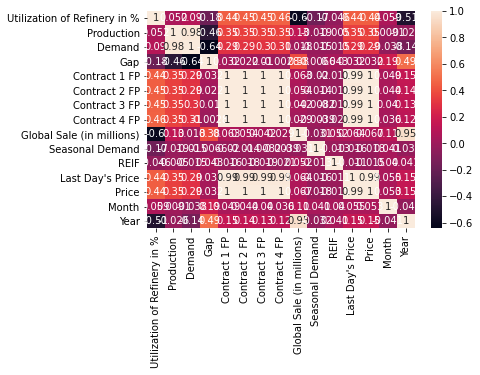

In [ ]:
import seaborn as sns
corelation = df.corr()
sns.heatmap(corelation,xticklabels= corelation.columns ,yticklabels= corelation.columns , annot = True)

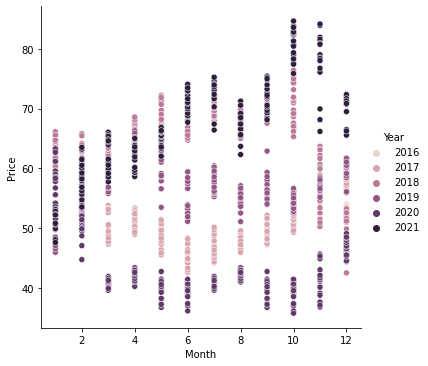

In [ ]:
sns.relplot(x = 'Month',y = 'Price' ,hue = 'Year' ,data= df)

C:\Users\Pallavi\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


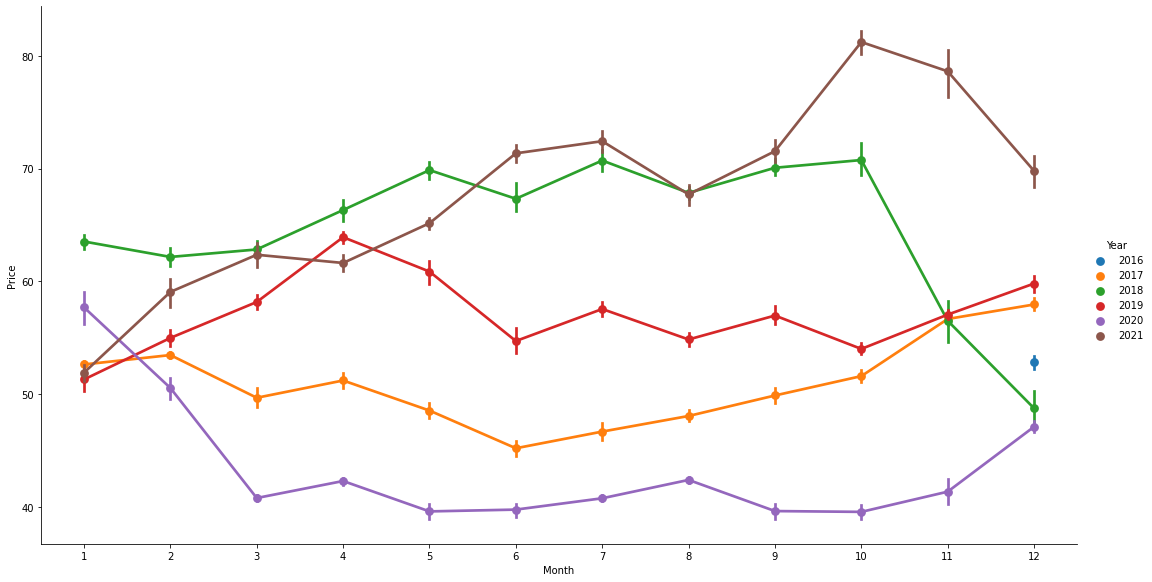

In [ ]:
sns.factorplot(data = df, x ="Month", y = "Price", hue = "Year", height=8, aspect=15/8 )

C:\Users\Pallavi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

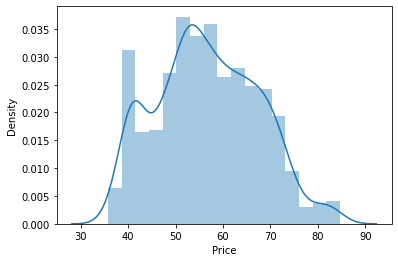

In [ ]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Month', ylabel='Price'>

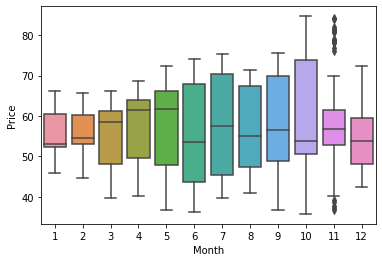

In [ ]:
sns.boxplot(x='Month', y='Price', data= df)

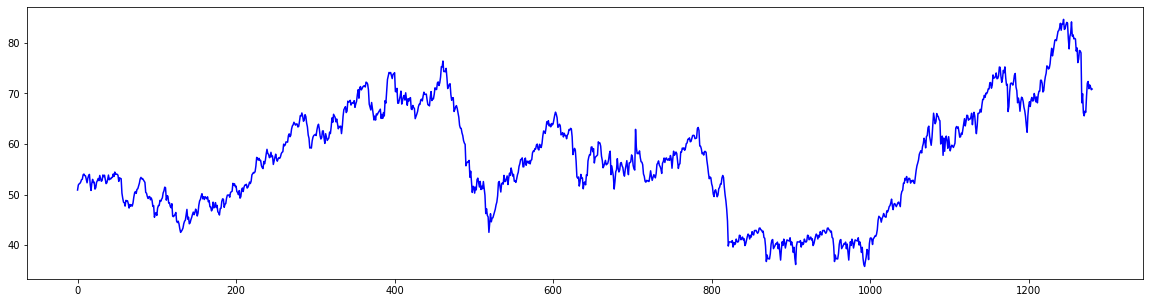

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(df.Price,color = "Blue")

In [ ]:
df = df.set_index('Date')

In [ ]:
df

,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price,Month,Year
Date,,,,,,,,,,,,,,,
2016-12-15,91.5,4516.18,4334.960,181.220,50.90,51.97,52.91,53.62,0.905,2,0.1,50.90,50.90,12,2016
2016-12-16,91.5,4515.22,4341.639,173.581,51.90,52.95,53.87,54.56,0.948,2,0.2,50.90,51.90,12,2016
2016-12-19,91.4,4514.26,4348.318,165.942,52.12,53.06,53.90,54.55,0.992,2,0.5,51.90,52.12,12,2016
2016-12-20,91.3,4513.30,4354.997,158.303,52.23,53.30,54.19,54.90,1.035,2,0.1,52.12,52.23,12,2016
2016-12-21,91.2,4512.34,4361.676,150.664,52.49,53.38,54.10,54.66,1.079,2,0.4,52.23,52.49,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-09,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.1,72.36,70.94,12,2021
2021-12-10,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.4,70.94,71.67,12,2021
2021-12-13,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.67,71.29,12,2021


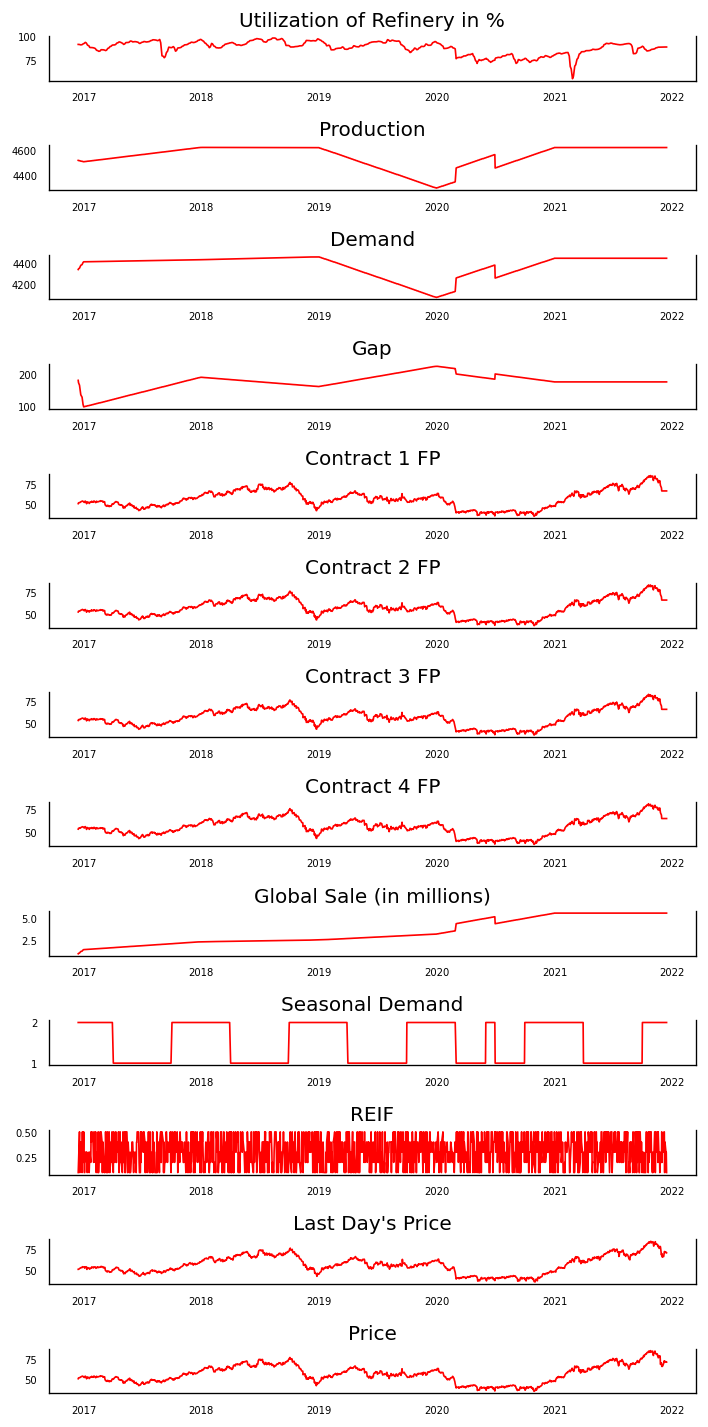

In [ ]:
fig, axes = plt.subplots(nrows=13,ncols=1, dpi = 120 , figsize = (6,12))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color = 'red', linewidth = 1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
for i in range(len(df.columns)):
    result = adfuller(df[df.columns[i]])

    if result[1] > 0.05:
        print('{} - Series is not stationary'.format(df.columns[i]))
    else:
        print('{} - Series is stationary'.format(df.columns[i]))

Utilization of Refinery in % - Series is stationary
Production - Series is not stationary
Demand - Series is not stationary
Gap - Series is stationary
Contract 1 FP - Series is not stationary
Contract 2 FP - Series is not stationary
Contract 3 FP - Series is not stationary
Contract 4 FP - Series is not stationary
Global Sale (in millions) - Series is not stationary
Seasonal Demand - Series is stationary
REIF - Series is stationary
Last Day's Price - Series is not stationary
Price - Series is not stationary
Month - Series is stationary
Year - Series is not stationary


### Inorder to make data stationary implement the differncing

In [ ]:
for i in range(len(df.columns)):
    result = adfuller(df[df.columns[i]].diff()[1:])

    if result[1] > 0.05:
        print('{} - Series is not stationary'.format(df.columns[i]))
    else:
        print('{} - Series is stationary'.format(df.columns[i]))

Utilization of Refinery in % - Series is stationary
Production - Series is stationary
Demand - Series is stationary
Gap - Series is stationary
Contract 1 FP - Series is stationary
Contract 2 FP - Series is stationary
Contract 3 FP - Series is stationary
Contract 4 FP - Series is stationary
Global Sale (in millions) - Series is stationary
Seasonal Demand - Series is stationary
REIF - Series is stationary
Last Day's Price - Series is stationary
Price - Series is stationary
Month - Series is stationary
Year - Series is stationary


* H0: Xt does not granger causes Yt
* H1: Xt granger causes Yt

In [ ]:
max_lags = 8
y = 'Price'

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from tqdm import tqdm_notebook
from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [ ]:
for i in range(len(df.columns)-1):
    results = grangercausalitytests((df[[y,df.columns[i+1]]].diff()[1:]),max_lags,verbose = False)
    p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
    print('\n Column - {} : P_Values - {}'.format(df.columns[i+1],p_values))


 Column - Production : P_Values - [0.7278, 0.901, 0.9624, 0.9833, 0.9944, 0.9983, 0.9993, 0.9998]

 Column - Demand : P_Values - [0.722, 0.9009, 0.9652, 0.985, 0.9947, 0.9979, 0.9984, 0.9995]

 Column - Gap : P_Values - [0.7741, 0.9404, 0.9834, 0.9934, 0.9961, 0.9903, 0.9882, 0.9925]

 Column - Contract 1 FP : P_Values - [0.0422, 0.0948, 0.1687, 0.2544, 0.4208, 0.5639, 0.3764, 0.0917]

 Column - Contract 2 FP : P_Values - [0.1599, 0.2277, 0.3063, 0.4223, 0.5815, 0.6862, 0.7402, 0.3426]

 Column - Contract 3 FP : P_Values - [0.3244, 0.2852, 0.4118, 0.5568, 0.6578, 0.7775, 0.8509, 0.6111]

 Column - Contract 4 FP : P_Values - [0.4076, 0.3003, 0.4772, 0.6106, 0.6989, 0.8047, 0.8736, 0.7182]

 Column - Global Sale (in millions) : P_Values - [0.8171, 0.9589, 0.9918, 0.9973, 0.9979, 0.9993, 0.9995, 0.9999]

 Column - Seasonal Demand : P_Values - [0.1687, 0.0633, 0.1318, 0.1951, 0.278, 0.3288, 0.1405, 0.2055]

 Column - REIF : P_Values - [0.8203, 0.9456, 0.9736, 0.6143, 0.8116, 0.8152, 0.846

In [ ]:
for i in range(len(df.columns)-2):
    results = grangercausalitytests((df[[y,df.columns[i+1]]].diff()[1:]),max_lags,verbose = False)
    p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
    print('\n Column - {} : P_Values - {}'.format(df.columns[i+1],p_values))


 Column - Production : P_Values - [0.7278, 0.901, 0.9624, 0.9833, 0.9944, 0.9983, 0.9993, 0.9998]

 Column - Demand : P_Values - [0.722, 0.9009, 0.9652, 0.985, 0.9947, 0.9979, 0.9984, 0.9995]

 Column - Gap : P_Values - [0.7741, 0.9404, 0.9834, 0.9934, 0.9961, 0.9903, 0.9882, 0.9925]

 Column - Contract 1 FP : P_Values - [0.0422, 0.0948, 0.1687, 0.2544, 0.4208, 0.5639, 0.3764, 0.0917]

 Column - Contract 2 FP : P_Values - [0.1599, 0.2277, 0.3063, 0.4223, 0.5815, 0.6862, 0.7402, 0.3426]

 Column - Contract 3 FP : P_Values - [0.3244, 0.2852, 0.4118, 0.5568, 0.6578, 0.7775, 0.8509, 0.6111]

 Column - Contract 4 FP : P_Values - [0.4076, 0.3003, 0.4772, 0.6106, 0.6989, 0.8047, 0.8736, 0.7182]

 Column - Global Sale (in millions) : P_Values - [0.8171, 0.9589, 0.9918, 0.9973, 0.9979, 0.9993, 0.9995, 0.9999]

 Column - Seasonal Demand : P_Values - [0.1687, 0.0633, 0.1318, 0.1951, 0.278, 0.3288, 0.1405, 0.2055]

 Column - REIF : P_Values - [0.8203, 0.9456, 0.9736, 0.6143, 0.8116, 0.8152, 0.846

In [ ]:
data = df[['Price','Production','Demand','Contract 2 FP']]
data.shape

(1281, 4)

In [ ]:
data

,Price,Production,Demand,Contract 2 FP
Date,,,,
2016-12-15,50.90,4516.18,4334.960,51.97
2016-12-16,51.90,4515.22,4341.639,52.95
2016-12-19,52.12,4514.26,4348.318,53.06
2016-12-20,52.23,4513.30,4354.997,53.30
2016-12-21,52.49,4512.34,4361.676,53.38
...,...,...,...,...
2021-12-09,70.94,4618.37,4442.050,65.85
2021-12-10,71.67,4618.37,4442.050,65.85
2021-12-13,71.29,4618.37,4442.050,65.85


In [ ]:
df_train = data[:int(0.9*(len(data)))]
df_test = data[int(0.9*(len(data))):]

In [ ]:
df_train.shape

(1152, 4)

In [ ]:
df_test.shape

(129, 4)

In [ ]:
df_test

,Price,Production,Demand,Contract 2 FP
Date,,,,
2021-06-16,72.15,4618.37,4442.05,71.95
2021-06-17,71.04,4618.37,4442.05,70.78
2021-06-18,71.64,4618.37,4442.05,71.29
2021-06-21,73.66,4618.37,4442.05,73.12
2021-06-22,73.06,4618.37,4442.05,72.85
...,...,...,...,...
2021-12-09,70.94,4618.37,4442.05,65.85
2021-12-10,71.67,4618.37,4442.05,65.85
2021-12-13,71.29,4618.37,4442.05,65.85


In [ ]:
model = VAR(df_train)
sorted_order = model.select_order(maxlags=20)
sorted_order.summary()

,AIC,BIC,FPE,HQIC
0,16.98,17.00,2.374e+07,16.99
1,-4.368,-4.279,0.01268,-4.334
2,-8.612,-8.452*,0.0001819,-8.552*
3,-8.627*,-8.396,0.0001792*,-8.539
4,-8.606,-8.304,0.0001830,-8.492
5,-8.583,-8.210,0.0001873,-8.442
6,-8.579,-8.134,0.0001881,-8.411
7,-8.556,-8.041,0.0001924,-8.361
8,-8.538,-7.952,0.0001958,-8.317
9,-8.520,-7.862,0.0001996,-8.271


In [ ]:
var_model = VARMAX(df_train, order = (2,0), enforce_stationarity= True)
fitted_model = var_model.fit(disp = False)
fitted_model.summary()

Dep. Variable:,"['Price', 'Production', 'Demand', 'Contract 2 FP']",No. Observations:,1152
Model:,VAR(2),Log Likelihood,-4622.583
,+ intercept,AIC,9337.166
Date:,"Sat, 25 Dec 2021",BIC,9569.432
Time:,20:54:53,HQIC,9424.835
Sample:,0,,
,- 1152,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.00, 0.00, 0.38, 5.29",Jarque-Bera (JB):,"1041.06, 12674612.49, 23930791.22, 149026.28"
Prob(Q):,"0.99, 0.98, 0.54, 0.02",Prob(JB):,"0.00, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"1.69, 99.18, 0.00, 0.20",Skew:,"-0.21, -0.14, -20.88, 0.63"


In [ ]:
n_forecast = 129
predict = fitted_model.get_prediction(start = len(df_train), end = len(df_train) + n_forecast - 1)
predictions = predict.predicted_mean

In [ ]:
predictions.columns= [['Price_predict', 'Production_predict','Demand_predict','Contract 2 FP_predict']]
predictions

,Price_predict,Production_predict,Demand_predict,Contract 2 FP_predict
1152,72.016811,4617.613055,4441.196272,71.761633
1153,71.969233,4616.948864,4440.461967,71.708946
1154,71.924632,4616.284888,4439.739327,71.663740
1155,71.877086,4615.622397,4439.028681,71.614356
1156,71.830292,4614.962191,4438.329910,71.566605
...,...,...,...,...
1276,64.566857,4552.040228,4375.219723,64.468463
1277,64.503815,4551.664493,4374.816165,64.406807
1278,64.440875,4551.291217,4374.414925,64.345248
1279,64.378040,4550.920394,4374.016006,64.283790


## Plot of Forecast vs Actuals

In [ ]:
df_test

,Price,Production,Demand,Contract 2 FP
Date,,,,
2021-06-16,72.15,4618.37,4442.05,71.95
2021-06-17,71.04,4618.37,4442.05,70.78
2021-06-18,71.64,4618.37,4442.05,71.29
2021-06-21,73.66,4618.37,4442.05,73.12
2021-06-22,73.06,4618.37,4442.05,72.85
...,...,...,...,...
2021-12-09,70.94,4618.37,4442.05,65.85
2021-12-10,71.67,4618.37,4442.05,65.85
2021-12-13,71.29,4618.37,4442.05,65.85


In [ ]:
predictions_new = predictions.set_index(df_test.index)

In [ ]:
predictions_new

,Price_predict,Production_predict,Demand_predict,Contract 2 FP_predict
Date,,,,
2021-06-16,72.016811,4617.613055,4441.196272,71.761633
2021-06-17,71.969233,4616.948864,4440.461967,71.708946
2021-06-18,71.924632,4616.284888,4439.739327,71.663740
2021-06-21,71.877086,4615.622397,4439.028681,71.614356
2021-06-22,71.830292,4614.962191,4438.329910,71.566605
...,...,...,...,...
2021-12-09,64.566857,4552.040228,4375.219723,64.468463
2021-12-10,64.503815,4551.664493,4374.816165,64.406807
2021-12-13,64.440875,4551.291217,4374.414925,64.345248


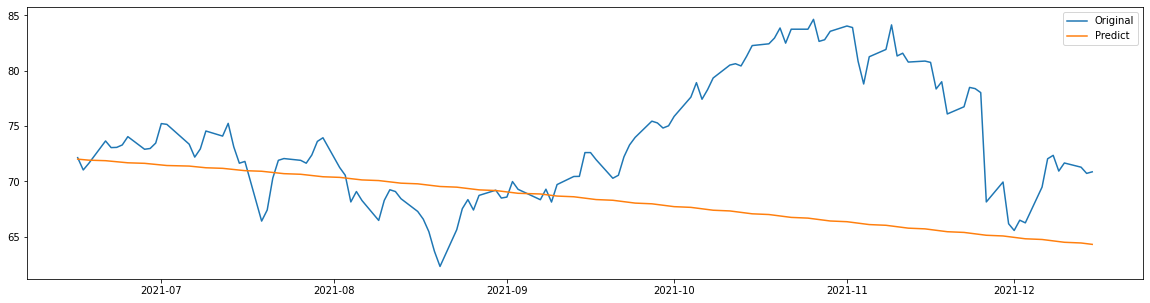

In [ ]:
x1 = df_test.index
#Data for the first line

y1 = df_test.Price

x2 = predictions_new.index
#Data for the second line

y2 = predictions_new.Price_predict

plt.plot(x1, y1)
plt.plot(x2, y2)

plt.legend(["Original", "Predict"])

In [ ]:
import numpy as np

def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
actual = df_test.values
pred = predictions_new.values

mape(actual, pred)

4.293491891465015

In [ ]:
actual = df_test['Price'].values
pred = predictions_new['Price_predict'].values

mape(actual, pred)

8.195357429630617